In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score ,roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
pd.pandas.set_option('display.max_columns',None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [67]:
df.SeniorCitizen.value_counts()
#feature is categorical data let's convert it from int to oject

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [68]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
df[df.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [71]:
len(df[df.TotalCharges==' '])

11

In [72]:
df.TotalCharges=df.TotalCharges.replace(' ',np.nan)

In [73]:
df.TotalCharges=df.TotalCharges.astype('float')

In [74]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
df.drop_duplicates(inplace=True)#dropping duplicates

In [95]:
df.reset_index()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7028,7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7029,7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [96]:
df.describe()#checking stats of numeric features

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [97]:
#coverting string data into numeric form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])

In [98]:
df.drop('customerID',axis=1,inplace=True)

KeyError: "['customerID'] not found in axis"

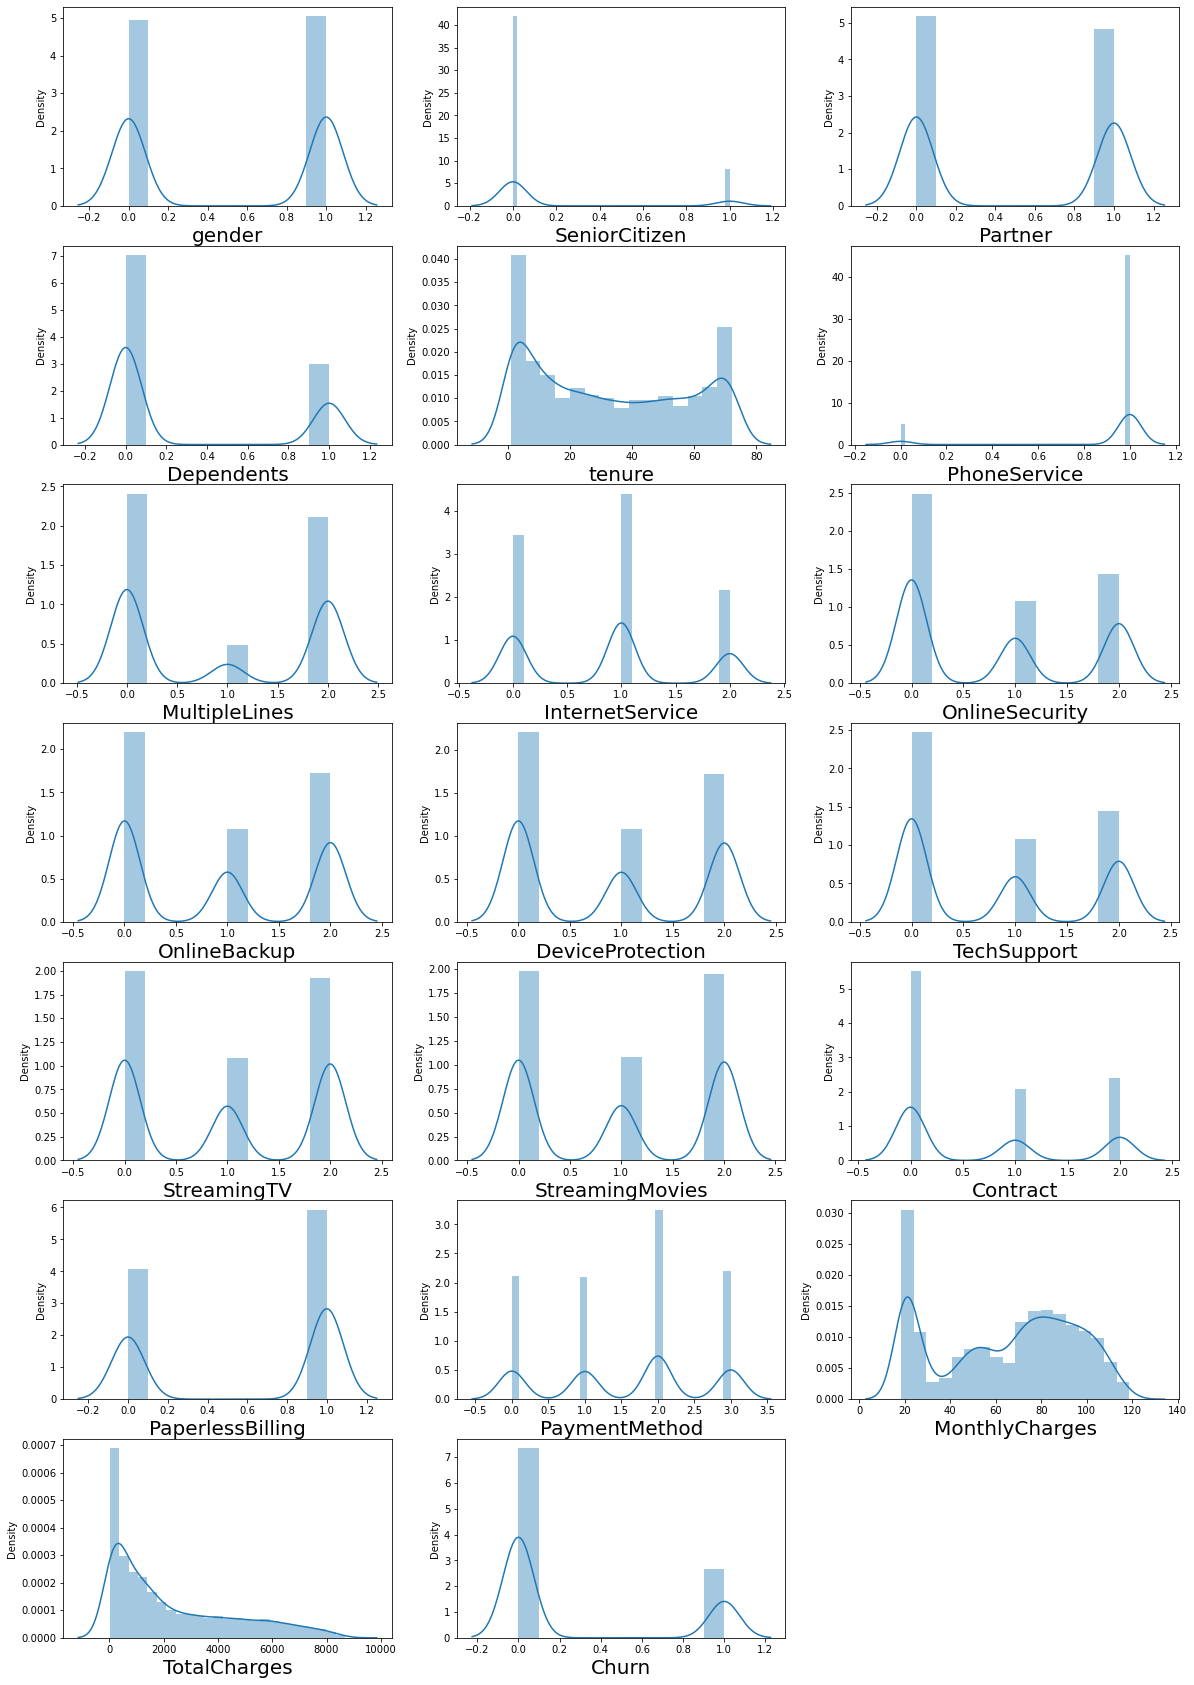

In [99]:
#let's visualize it
plt.figure(figsize=(20,30),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

Tenure,monthly charges,total charges have skewness.

all others are categorical features.

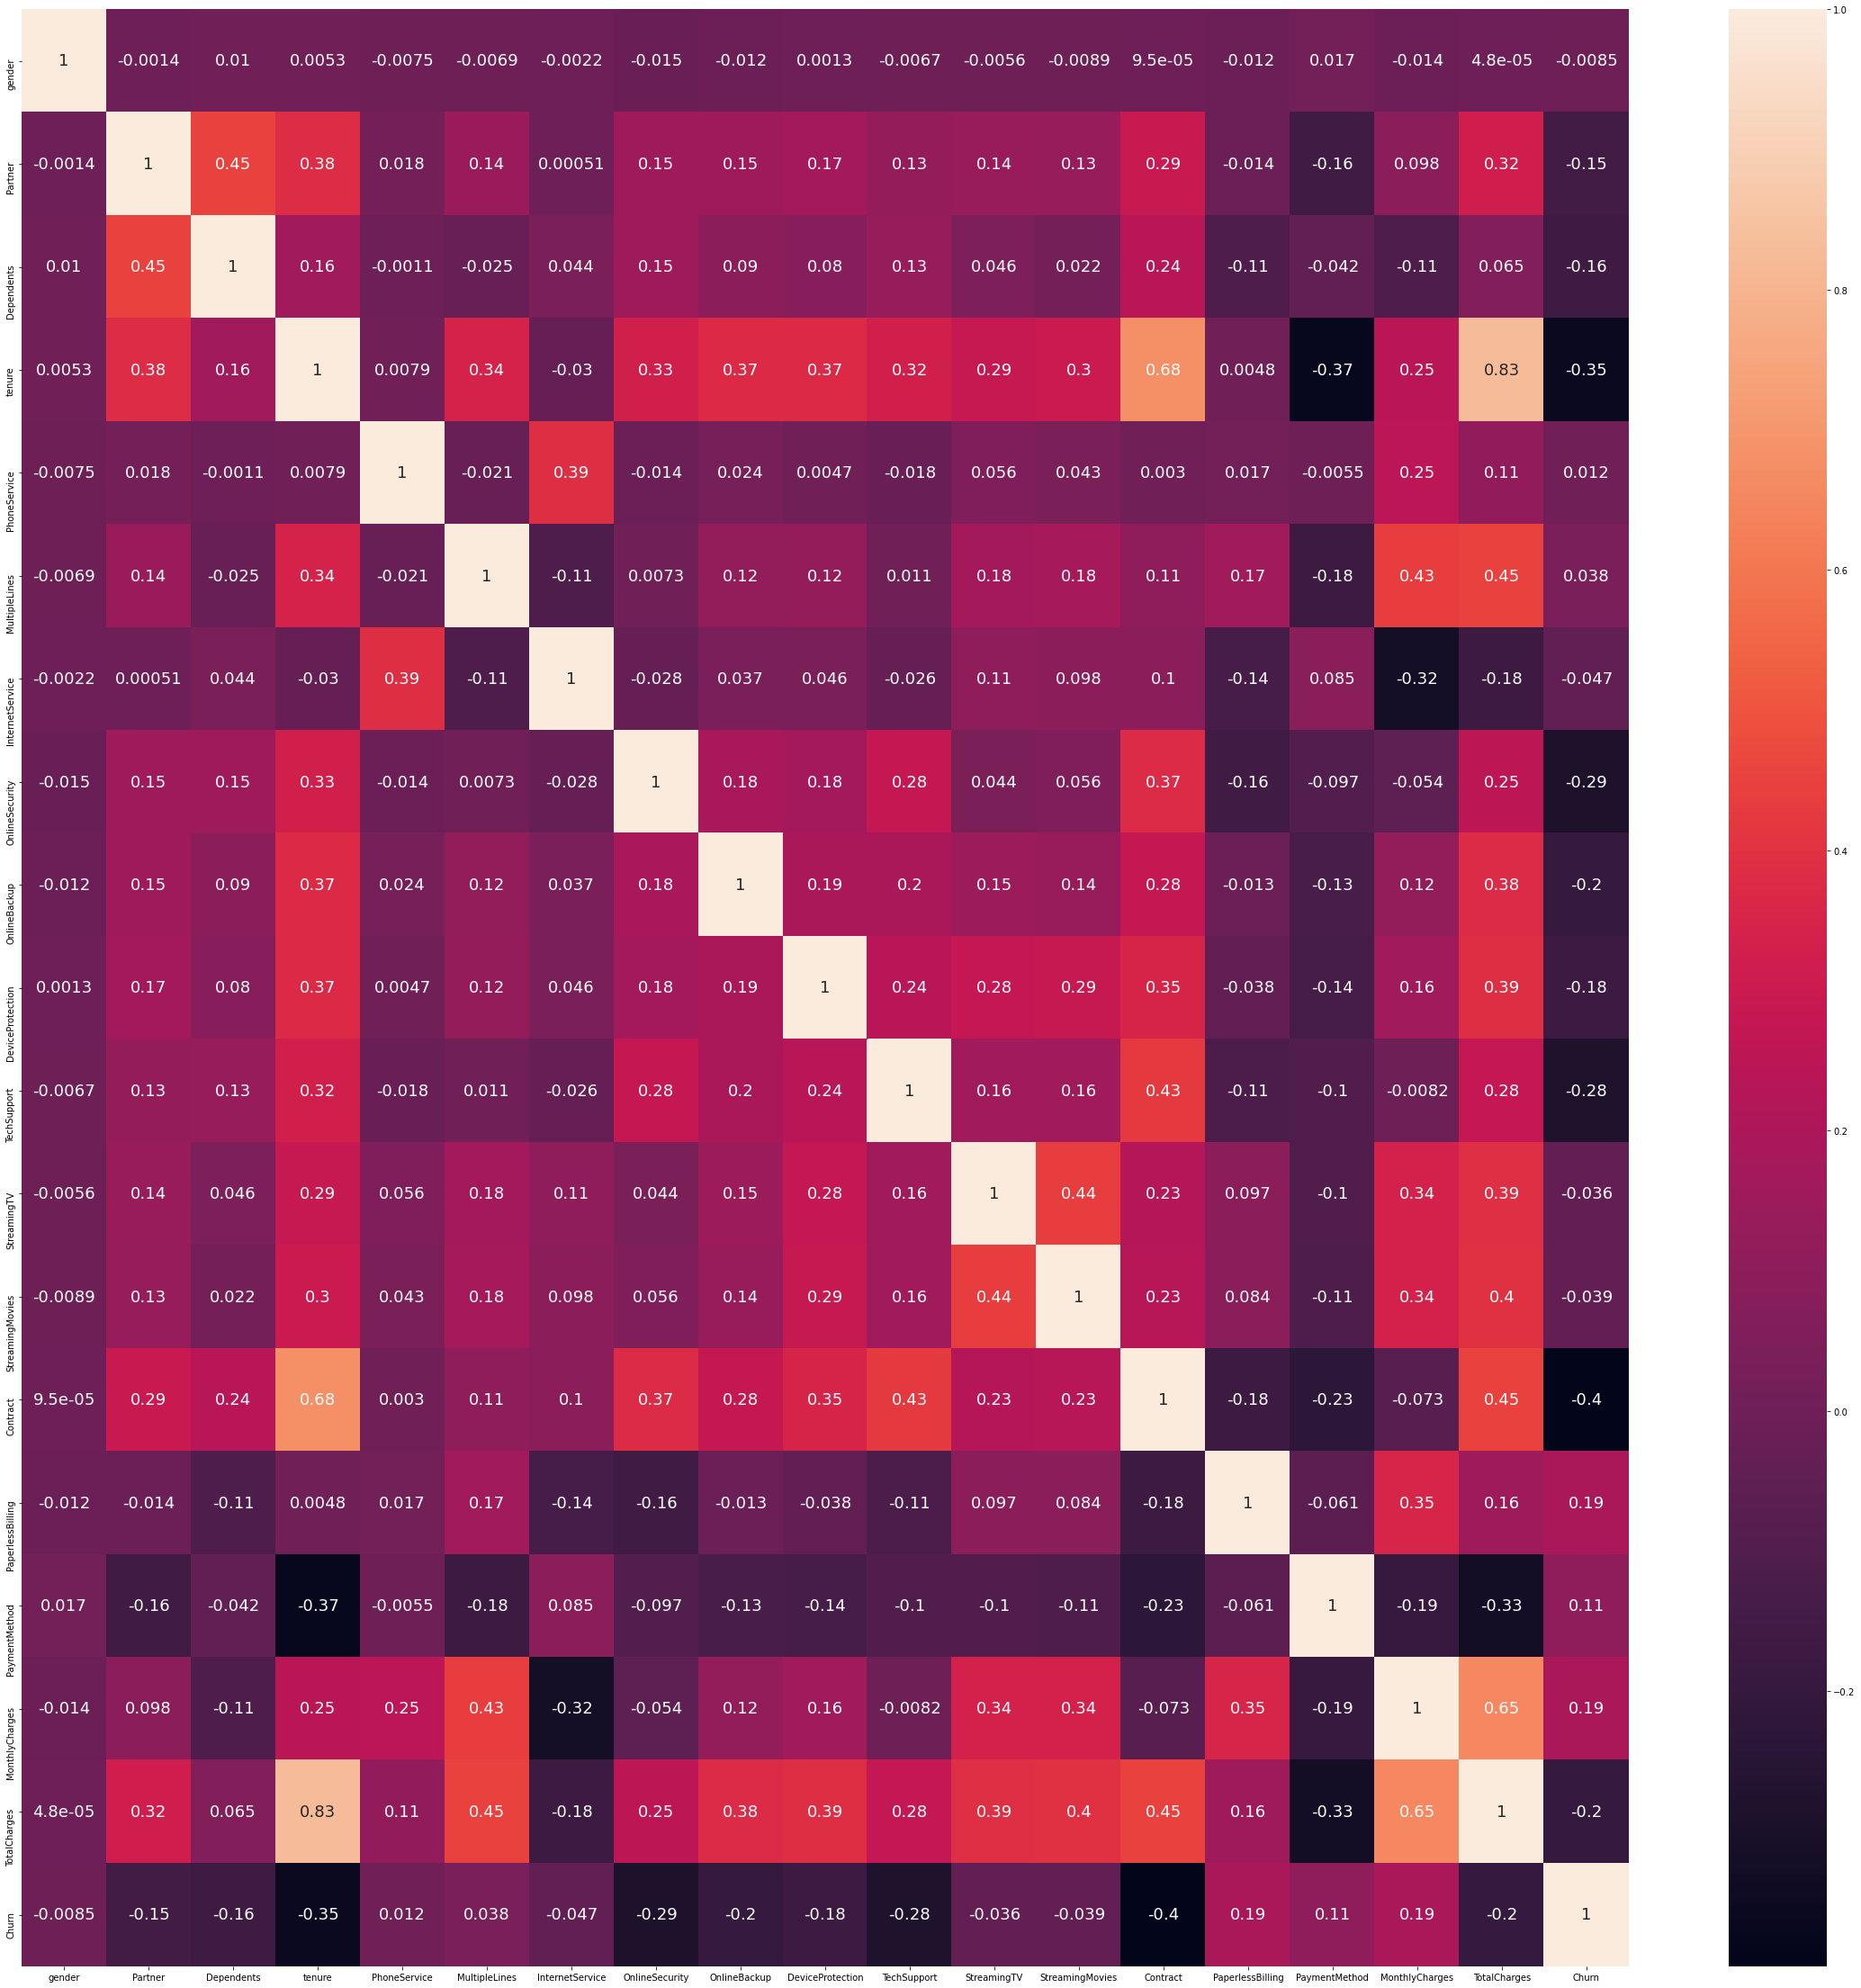

In [100]:
#checking for multicollinearity
corr=df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(data=corr,annot=True,annot_kws={'size':18})
plt.show()

From the correlation heatmap, we can see that the dependent feature 'churn' is positive correlated with the Monthly charges and Senior Citizen and Negatively correlated with the Tenure.

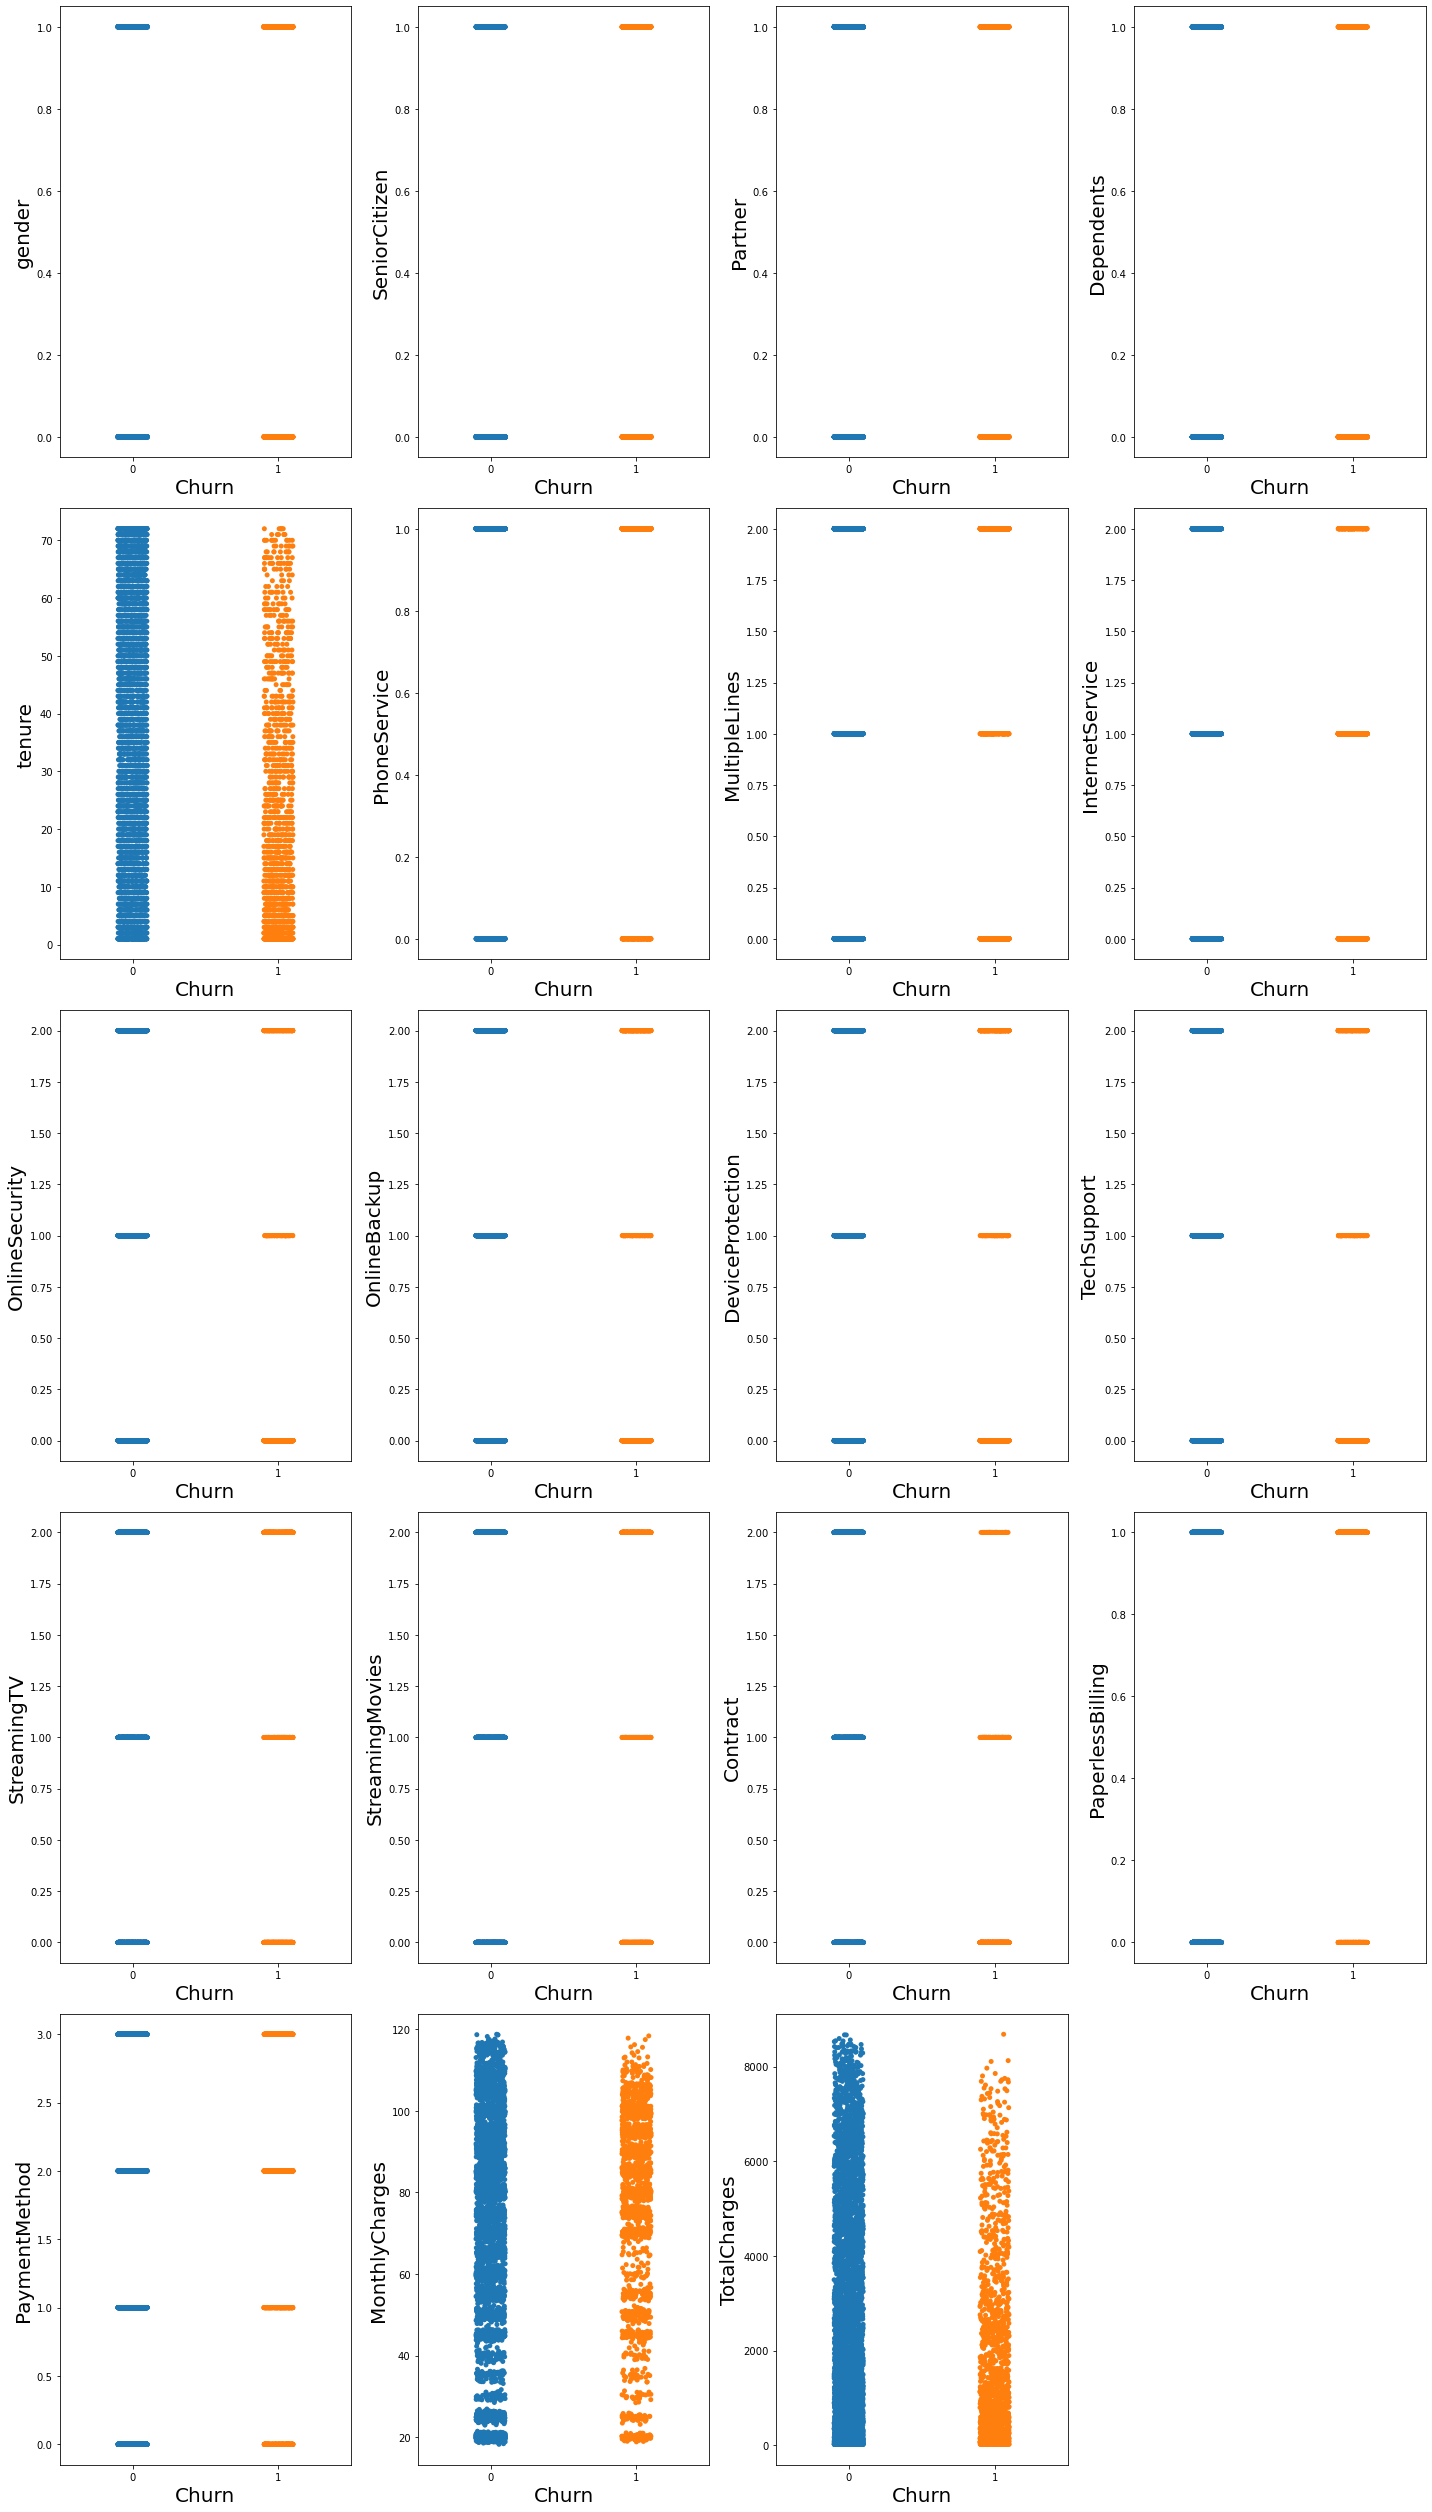

In [83]:
#visualizing data relation between feature and label
X=df.drop('Churn',axis=1)
y=df.Churn
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=19:
        ax=plt.subplot(5,4,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [108]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [109]:
df.Churn.value_counts()#checking for imbalance target column

0    5163
1    1869
Name: Churn, dtype: int64

### Fixing Imbalanced dataset using SMOTE

In [102]:
X=df.drop('Churn',axis=1)
y=df.Churn
from imblearn.over_sampling import SMOTE
sme = SMOTE(random_state=42)
sme.fit(X, y)
X_resampled, Y_resampled = sme.fit_resample(X, y)

In [110]:
len(X_resampled)

10326

In [103]:
#checking for skewness

X_resampled.skew()#threshold=+_.50
#let's remove skewness using yeo-johnson method

gender              0.295287
SeniorCitizen       1.551764
Partner             0.511036
Dependents          1.394026
tenure              0.509428
PhoneService       -2.596422
MultipleLines       0.178975
InternetService     0.201452
OnlineSecurity      0.822101
OnlineBackup        0.494682
DeviceProtection    0.479178
TechSupport         0.809675
StreamingTV         0.146421
StreamingMovies     0.152696
Contract            1.165092
PaperlessBilling   -0.387528
PaymentMethod      -0.204509
MonthlyCharges     -0.430251
TotalCharges        1.115238
dtype: float64

In [111]:
from sklearn.preprocessing import power_transform
X_skew=power_transform(X_resampled,method='yeo-johnson')

In [112]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)
X_scaled

array([[-0.86321557, -0.56193921,  1.2876005 , ...,  0.44976063,
        -1.33488727, -1.75198923],
       [ 1.15845918, -0.56193921, -0.7766384 , ...,  1.46314992,
        -0.45118944,  0.39537907],
       [ 1.15845918, -0.56193921, -0.7766384 , ...,  1.46314992,
        -0.5580542 , -1.27234065],
       ...,
       [-0.86321557,  0.83364768, -0.7766384 , ...,  0.44976063,
        -1.60432453, -1.20353598],
       [-0.86321557, -0.56193921, -0.7766384 , ...,  0.44976063,
         0.3701472 , -1.12254152],
       [-0.86321557, -0.56193921, -0.7766384 , ..., -0.55661257,
         0.45812511,  0.65860275]])

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_resampled,test_size=.30,random_state=343)

In [107]:
len(X_scaled)

10326

### Logistic_Regression

In [114]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))
                            
                            


0.7930923176242737
[[1164  383]
 [ 258 1293]] 

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1547
           1       0.77      0.83      0.80      1551

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



In [115]:
print('Training score:',log_reg.score(X_train,y_train))
print('Testing score:',log_reg.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(log_reg,X_scaled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

Training score: 0.8011898173768678
Testing score: 0.7930923176242737
Cross_validation_score: 0.7965376943433288


### Random_forest_classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_scaled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8363460296965785
[[1300  247]
 [ 260 1291]] 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1547
           1       0.84      0.83      0.84      1551

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

Training score: 0.9988931931377975
Testing score: 0.8363460296965785
Cross_validation_score: 0.8362501377074695


### SVC_classifier

In [117]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
train_pred=svc.predict(X_train)
print("svc_training_score:",svc.score(X_train,y_train))
print("svc_testing_score:",svc.score(X_test,y_test))
pred_svc = svc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X_scaled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

svc_training_score: 0.8508577753182069
svc_testing_score: 0.8082633957391866
accuracy_score : 0.8082633957391866
[[1199  348]
 [ 246 1305]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1547
           1       0.79      0.84      0.81      1551

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

Cross_validation_score: 0.808548832826648


### ADA Boost Classifier

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_scaled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8143963847643642
[[1197  350]
 [ 225 1326]] 

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1547
           1       0.79      0.85      0.82      1551

    accuracy                           0.81      3098
   macro avg       0.82      0.81      0.81      3098
weighted avg       0.82      0.81      0.81      3098

Training score: 0.8375760929717764
Testing score: 0.8143963847643642
Cross_validation_score: 0.8141655161744747


### XGBoost Classifier

In [119]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=xgb.predict(X_train)
print('Training score:',xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,X_scaled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

[21:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8369916074887024
[[1287  260]
 [ 245 1306]] 

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1547
           1       0.83      0.84      0.84      1551

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

Training score: 0.9620918649695628
Testing score: 0.8369916074887024
[21:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

### AdaboostClassifier using Logistic regression as base estimator

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada1=AdaBoostClassifier(base_estimator=log_reg,learning_rate=1)
ada1.fit(X_train,y_train)
y_pred=ada1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada1.predict(X_train)
print('Training score:',ada1.score(X_train,y_train))
print('Testing score:',ada1.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada1,X_scaled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.7918011620400258
[[1155  392]
 [ 253 1298]] 

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1547
           1       0.77      0.84      0.80      1551

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

Training score: 0.8010514665190924
Testing score: 0.7918011620400258
Cross_validation_score: 0.7968280637275009


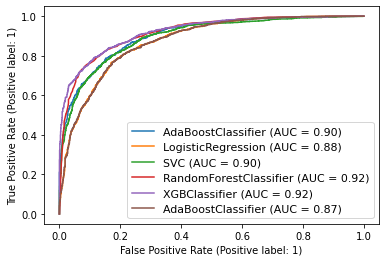

In [121]:
#Let's find best model using Reciever's operating curve by calculating area_under_the_curve
disp=plot_roc_curve(ada,X_test,y_test)
plot_roc_curve(log_reg,X_test,y_test,ax=disp.ax_) #ax_=Axes with confusion matrix of adaboost
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ada1,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Random forest classifier  is best model let's do hyperparameter tuning.

In [122]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
#let's tune parameter with grid search cv
rf=RandomForestClassifier()
params={'n_estimators':[50,100,150,200,250,300],
       'criterion':['entropy'],
       'max_depth':[10,15,20,25],
       }
from sklearn.model_selection import GridSearchCV
grd=GridSearchCV(rf,param_grid=params,n_jobs=-1)
grd.fit(X_train,y_train)
clf=grd.best_estimator_   #reinstantiating with best params

In [128]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [129]:
rf=RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=1,
                       n_estimators=150)
rf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cnf=confusion_matrix(y_test,y_pred)
print(cnf)
print(accuracy_score(y_test,y_pred))

[[1308  239]
 [ 263 1288]]
0.8379599741768883


In [ ]:
#saving the model in local system
import pickle
filename='finalized_customer_churn.pickle'
pickle.dump(rf,open(filename,'wb'))

### End